# Spaceship titanic

Please visit the kaggle website for the competition for details https://www.kaggle.com/competitions/spaceship-titanic

**Objective**: Discover which passengers were transported to alternate dimensions

Step 1: Data exploration

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
# Get files from dropbox
!wget https://www.dropbox.com/s/k28hxp23pne7pp9/spaceship-titanic.zip?dl=0

--2022-05-19 23:34:08--  https://www.dropbox.com/s/k28hxp23pne7pp9/spaceship-titanic.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.8.18, 2620:100:601b:18::a27d:812
Connecting to www.dropbox.com (www.dropbox.com)|162.125.8.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/k28hxp23pne7pp9/spaceship-titanic.zip [following]
--2022-05-19 23:34:08--  https://www.dropbox.com/s/raw/k28hxp23pne7pp9/spaceship-titanic.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucfc86663c4faccfce2122fc3dc4.dl.dropboxusercontent.com/cd/0/inline/BlmTtsHTCRk_yYRcnTm7auGwemKODoegMR-ti4GC0R7f_gLV1x9PUPLaEkj-DkpP5EbxR4qcNeflJSpxALq8HYC3Nm_-VCaPGYmsm8D-0EFUtT-HZDmGTZWlPw9ZvnuD1DxsGen-5qXpL6KzY-Zq8rSJ5UKUXbcHMBAdjgvR0UUGiw/file# [following]
--2022-05-19 23:34:09--  https://ucfc86663c4faccfce2122fc3dc4.dl.dropboxusercontent.com/cd/0/inline/BlmTtsHTCRk_yYRcnTm7auGwemKODoegMR-t

In [ ]:
#Unzip  files and assign to dataframes

!unzip spaceship-titanic.zip\?dl\=0

Archive:  spaceship-titanic.zip?dl=0
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [ ]:
!ls

 sample_data		'spaceship-titanic.zip?dl=0'   train.csv
 sample_submission.csv	 test.csv


In [ ]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sub = pd.read_csv('sample_submission.csv')

In [ ]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [ ]:
train['PassengerId1'] = train['PassengerId']
train['PassengerId2'] = train['PassengerId']

train['Cabin1'] = train['Cabin']
train['Cabin2'] = train['Cabin']
train['Cabin3'] = train['Cabin']
for i in range(np.size(train['PassengerId'])):
  train['PassengerId1'].loc[i] = str(train['PassengerId'].loc[i])[0:4]
  train['PassengerId2'].loc[i] = str(train['PassengerId'].loc[i])[5:7]
  train['Cabin1'].loc[i] = str(train['Cabin'].loc[i])[0]
  train['Cabin2'].loc[i] = str(train['Cabin'].loc[i])[2:-3]
  train['Cabin3'].loc[i] = str(train['Cabin'].loc[i])[-1]

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [ ]:
train.drop(['PassengerId','Cabin'], inplace=True, axis=1)

In [ ]:
train.tail()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,PassengerId1,PassengerId2,Cabin1,Cabin2,Cabin3
8688,Europa,False,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,9276,01,A,9,P
8689,Earth,True,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,9278,01,G,149,S
8690,Earth,False,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,9279,01,G,150,S
8691,Europa,False,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,9280,01,E,60,S
8692,Europa,False,TRAPPIST-1e,44.0,False,126.0,4688.0,0.0,0.0,12.0,Propsh Hontichre,True,9280,02,E,60,S


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8492 non-null   object 
 1   CryoSleep     8476 non-null   object 
 2   Destination   8511 non-null   object 
 3   Age           8514 non-null   float64
 4   VIP           8490 non-null   object 
 5   RoomService   8512 non-null   float64
 6   FoodCourt     8510 non-null   float64
 7   ShoppingMall  8485 non-null   float64
 8   Spa           8510 non-null   float64
 9   VRDeck        8505 non-null   float64
 10  Name          8493 non-null   object 
 11  Transported   8693 non-null   bool   
 12  PassengerId1  8693 non-null   object 
 13  PassengerId2  8693 non-null   object 
 14  Cabin1        8693 non-null   object 
 15  Cabin2        8693 non-null   object 
 16  Cabin3        8693 non-null   object 
dtypes: bool(1), float64(6), object(10)
memory usage: 1.1+ MB


In [ ]:
train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


Observe that some of the columns are objetcts

In [ ]:
for col in train.columns:
  print (col, "- uniques: ",train[col].isnull().values.any(), "- duplicates: ", train[col].duplicated().values.any())
  

HomePlanet - uniques:  True - duplicates:  True
CryoSleep - uniques:  True - duplicates:  True
Destination - uniques:  True - duplicates:  True
Age - uniques:  True - duplicates:  True
VIP - uniques:  True - duplicates:  True
RoomService - uniques:  True - duplicates:  True
FoodCourt - uniques:  True - duplicates:  True
ShoppingMall - uniques:  True - duplicates:  True
Spa - uniques:  True - duplicates:  True
VRDeck - uniques:  True - duplicates:  True
Name - uniques:  True - duplicates:  True
Transported - uniques:  False - duplicates:  True
PassengerId1 - uniques:  False - duplicates:  True
PassengerId2 - uniques:  False - duplicates:  True
Cabin1 - uniques:  False - duplicates:  True
Cabin2 - uniques:  False - duplicates:  True
Cabin3 - uniques:  False - duplicates:  True


Vamos adequar o dataset:
- eliminar Nulls
- eliminar duplicatas
- normalizar

In [ ]:
for col in train.columns:
  train.dropna(subset=[col], inplace=True)
  train.drop_duplicates()


In [ ]:
for col in train.columns:
  print (col, "- uniques: ",train[col].isnull().values.any())

HomePlanet - uniques:  False
CryoSleep - uniques:  False
Destination - uniques:  False
Age - uniques:  False
VIP - uniques:  False
RoomService - uniques:  False
FoodCourt - uniques:  False
ShoppingMall - uniques:  False
Spa - uniques:  False
VRDeck - uniques:  False
Name - uniques:  False
Transported - uniques:  False
PassengerId1 - uniques:  False
PassengerId2 - uniques:  False
Cabin1 - uniques:  False
Cabin2 - uniques:  False
Cabin3 - uniques:  False


Now we assign numeric values to the string columns and normalize

In [ ]:
df_num = train.select_dtypes(exclude=[np.number])
df_num.head()

,HomePlanet,CryoSleep,Destination,VIP,Name,Transported,PassengerId1,PassengerId2,Cabin1,Cabin2,Cabin3
0,Europa,False,TRAPPIST-1e,False,Maham Ofracculy,False,0001,01,B,,P
1,Earth,False,TRAPPIST-1e,False,Juanna Vines,True,0002,01,F,,S
2,Europa,False,TRAPPIST-1e,True,Altark Susent,False,0003,01,A,,S
3,Europa,False,TRAPPIST-1e,False,Solam Susent,False,0003,02,A,,S
4,Earth,False,TRAPPIST-1e,False,Willy Santantines,True,0004,01,F,,S


In [ ]:
train.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,PassengerId1,PassengerId2,Cabin1,Cabin2,Cabin3
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0001,01,B,,P
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0002,01,F,,S
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0003,01,A,,S
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0003,02,A,,S
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,0004,01,F,,S


In [ ]:
for cols in df_num.columns:
  print(cols)

HomePlanet
CryoSleep
Destination
VIP
Name
Transported
PassengerId1
PassengerId2
Cabin1
Cabin2
Cabin3


In [ ]:
for cols in df_num.columns:
  train[cols] = train[cols].astype('category').cat.codes


In [ ]:
def scales(df):
  df.columns
  notObject = df.columns[df.dtypes!='object']
  #df[notObject]
  for name in notObject:
    df[name] = (df[name]-df[name].min())/(df[name].max()-df[name].min())
  return df


In [ ]:
train_norm = scales(train)

In [ ]:
train_norm.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,PassengerId1,PassengerId2,Cabin1,Cabin2,Cabin3
0,0.5,0.0,1.0,0.493671,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.619923,0.0,0.000000,0.000000,0.125,0.0,0.0
1,0.0,0.0,1.0,0.303797,0.0,0.007608,0.000302,0.002040,0.024500,0.002164,0.530092,1.0,0.000196,0.000000,0.625,0.0,0.5
2,0.5,0.0,1.0,0.734177,1.0,0.003001,0.119948,0.000000,0.299670,0.002410,0.053661,0.0,0.000392,0.000000,0.000,0.0,0.5
3,0.5,0.0,1.0,0.417722,0.0,0.000000,0.043035,0.030278,0.148563,0.009491,0.840053,0.0,0.000392,0.142857,0.000,0.0,0.5
4,0.0,0.0,1.0,0.202532,0.0,0.021149,0.002348,0.012324,0.025214,0.000098,0.981026,1.0,0.000587,0.000000,0.625,0.0,0.5


In [ ]:
y_train = train_norm["Transported"]
x_train = train_norm.drop(columns = "Transported")

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test, Y_train, Y_test =  train_test_split(x_train, y_train, test_size=0.2, random_state=42)

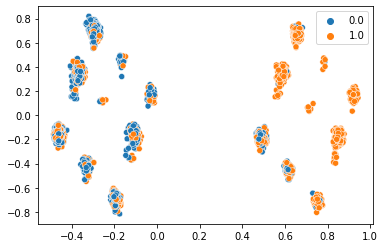

In [ ]:
from sklearn.decomposition import PCA
import seaborn as sns
pca = PCA(n_components = 10)
train_PCA = pca.fit_transform(X_train)
sns.scatterplot(x = train_PCA[:,0], y = train_PCA[:,1], hue = Y_train.values, data = train_PCA)

In [ ]:
pca.explained_variance_ratio_

array([0.22972351, 0.16906512, 0.15863659, 0.09547186, 0.0818126 ,
       0.0776367 , 0.06497053, 0.04148013, 0.02925194, 0.02131312])

Feature importance with random forests

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
forest = RandomForestClassifier()
forest.fit(X_train, Y_train.values.ravel())

In [ ]:

importances = forest.feature_importances_
importances
sorted_indices = np.argsort(importances)[::-1]
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()

Vemos que nenhuma das características é dominante diante das outras (exceto talvez um pouco a cabine, o que faria sentido). Vemos que coisas que na teoria não parecem fazer diferença (como nome ou ID) têm uma grande relevância

Vemos de início que um clustering simples provavelmente não é suficiente (embora vamos utilizar). Abaixo temos knn e svm

In [ ]:
from sklearn.neighbors import KNeighborsClassifier as knn

model = knn(n_neighbors = 4)
model.fit(X_train,Y_train)

In [ ]:
from sklearn import metrics

Y_pred= model.predict(X_test) 
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))

In [ ]:
from sklearn.svm import SVC

In [ ]:
modelsvm = SVC(kernel = 'rbf')
modelsvm.fit(X_train,Y_train)
Y_pred= modelsvm.predict(X_test) 
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))

In [ ]:
from sklearn.linear_model import SGDClassifier as sgd
#modelsgd = sgd(loss = 'huber', shuffle = True, random_state = 42)
modelsgd = sgd(loss="perceptron", eta0=1, learning_rate="constant", penalty=None)
modelsgd.fit(X_train,Y_train)
Y_pred= modelsgd.predict(X_test) 
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))

In [ ]:
from keras.models import Sequential, Model
from keras.layers import Conv1D, MaxPooling2D, Dense, Flatten, Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras import regularizers

In [ ]:

def model_pipeline():
    model = Sequential()
    #model.add(Conv1D(16,kernel_size=5,activation='relu',input_shape=(C,1)))
    model.add(Dense(10, activation='relu'))
    model.add(Dropout(rate=0.2)) 
    model.add(Dense(10, activation='relu'))
    model.add(Dropout(rate=0.2)) 
    model.add(Dense(10, activation='relu'))
    model.add(Dropout(rate=0.2)) 
    model.add(Dense(10, activation='relu'))
    model.add(Dropout(rate=0.2)) 
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy',optimizer="adam",metrics=['accuracy'])
    return model

In [ ]:
R, C = np.shape(X_train)
print(R)
print(C)

In [ ]:
modelANN = model_pipeline()
modelANN.build(np.shape(X_train))
modelANN.summary()

In [ ]:
modelANN.fit(X_train, 
          Y_train,
          epochs = 50, 
          batch_size = 32, 
          )

In [ ]:
Y_pred= modelANN.predict(X_test).reshape(np.shape(Y_test))
Y_pred = Y_pred.flatten()
print(Y_pred.round(2))
# [1. 0.01 0.91 0.87 0.06 0.95 0.24 0.58 0.78 ...

# extract the predicted class labels
y_pred = np.where(Y_pred > 0.5, 1, 0)
print(y_pred)
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(Y_test, y_pred))

In [ ]:
test = pd.read_csv('sample_submission.csv')

In [ ]:
for col in test.columns:
  test.dropna(subset=[col], inplace=True)
  test.drop_duplicates()

In [ ]:
test.head(30)

In [ ]:

for i in range(np.size(test['PassengerId'])):
  test['PassengerId'].loc[i] = str(test['PassengerId'].loc[i]).replace('_','')

In [ ]:
test.head()